importing the dataset

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

importing pandas and combining features and target into a single dataframe

In [2]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [3]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

renaming columns for easier access

In [4]:
columns_needed = ['age','bp','sg','al','su','bgr','bu','sod','pot','hemo','pcv','wbcc','rbcc','class']

df = df[columns_needed]

In [5]:
df.columns = [
    "age",
    "blood_pressure",
    "specific_gravity",
    "albumin",
    "sugar",
    "blood_glucose_random",
    "blood_urea",
    "sodium",
    "potassium",
    "hemoglobin",
    "packed_cell_volume",
    "white_blood_cell_count",
    "red_blood_cell_count",
    "class"
]
df

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


In [6]:
df = df.copy()
df['hemoglobin'] = pd.to_numeric(df['hemoglobin'], errors='coerce') * 10
df

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,113.0,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,96.0,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,notckd


In [7]:
df['class'] = df['class'].replace({'ckd': 'a', 'notckd': 'c'})

In [8]:
df = df[df.isnull().sum(axis=1) < 3]
print(f"Rows after cleaning: {len(df)}")

Rows after cleaning: 265


In [9]:
df_affected = df[df['class'] == 'a']
df_control = df[df['class'] == 'c']

print(f"Affected rows: {len(df_affected)}")
print(f"Control rows: {len(df_control)}")

Affected rows: 126
Control rows: 139


In [10]:
df_affected

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,154.0,44.0,7800.0,5.2,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,112.0,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,116.0,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,122.0,39.0,7800.0,4.4,a
6,68.0,70.0,1.010,0.0,0.0,100.0,54.0,104.0,4.0,124.0,36.0,NaN,NaN,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,62.0,90.0,1.020,2.0,1.0,169.0,48.0,138.0,2.9,134.0,47.0,11000.0,6.1,a
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,122.0,40.0,9800.0,4.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,86.0,26.0,5000.0,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,126.0,37.0,10200.0,4.1,a


In [11]:
df_control

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c



=== Affected Individuals ===

               age  blood_pressure  specific_gravity     albumin       sugar  \
count   123.000000      125.000000        125.000000  126.000000  126.000000   
unique         NaN             NaN               NaN         NaN         NaN   
top            NaN             NaN               NaN         NaN         NaN   
freq           NaN             NaN               NaN         NaN         NaN   
mean     57.081301       80.720000          1.013560    1.849206    0.809524   
std      14.465104       15.769305          0.004527    1.437038    1.366539   
min       6.000000       50.000000          1.005000    0.000000    0.000000   
25%      49.500000       70.000000          1.010000    0.250000    0.000000   
50%      60.000000       80.000000          1.015000    2.000000    0.000000   
75%      65.000000       90.000000          1.015000    3.000000    1.000000   
max      90.000000      180.000000          1.025000    5.000000    5.000000   

        

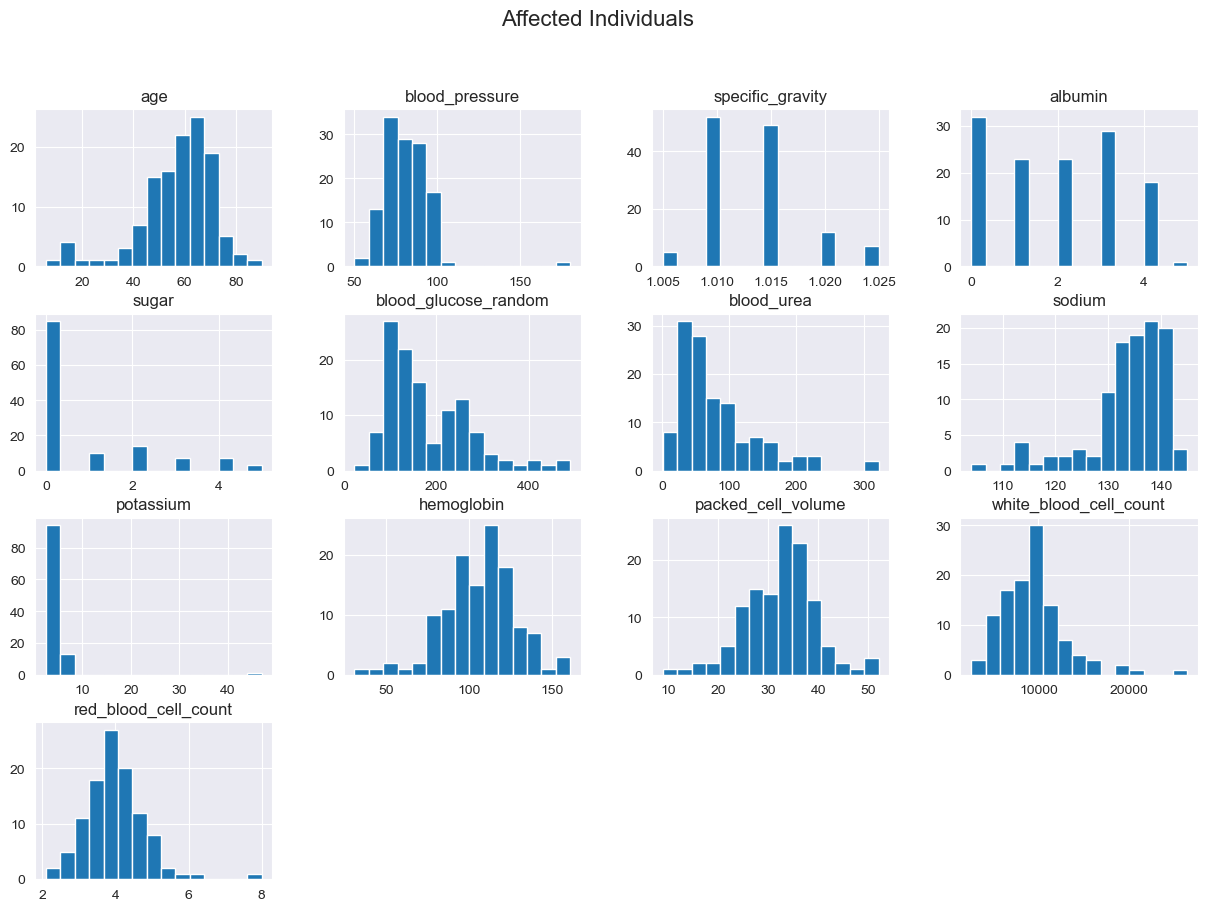


=== Control Individuals ===

               age  blood_pressure  specific_gravity  albumin  sugar  \
count   139.000000      137.000000        139.000000    139.0  139.0   
unique         NaN             NaN               NaN      NaN    NaN   
top            NaN             NaN               NaN      NaN    NaN   
freq           NaN             NaN               NaN      NaN    NaN   
mean     46.568345       71.313869          1.022482      0.0    0.0   
std      15.903719        8.559267          0.002509      0.0    0.0   
min      12.000000       60.000000          1.020000      0.0    0.0   
25%      34.000000       60.000000          1.020000      0.0    0.0   
50%      46.000000       70.000000          1.020000      0.0    0.0   
75%      58.000000       80.000000          1.025000      0.0    0.0   
max      80.000000       80.000000          1.025000      0.0    0.0   

        blood_glucose_random  blood_urea      sodium   potassium  hemoglobin  \
count             135.000

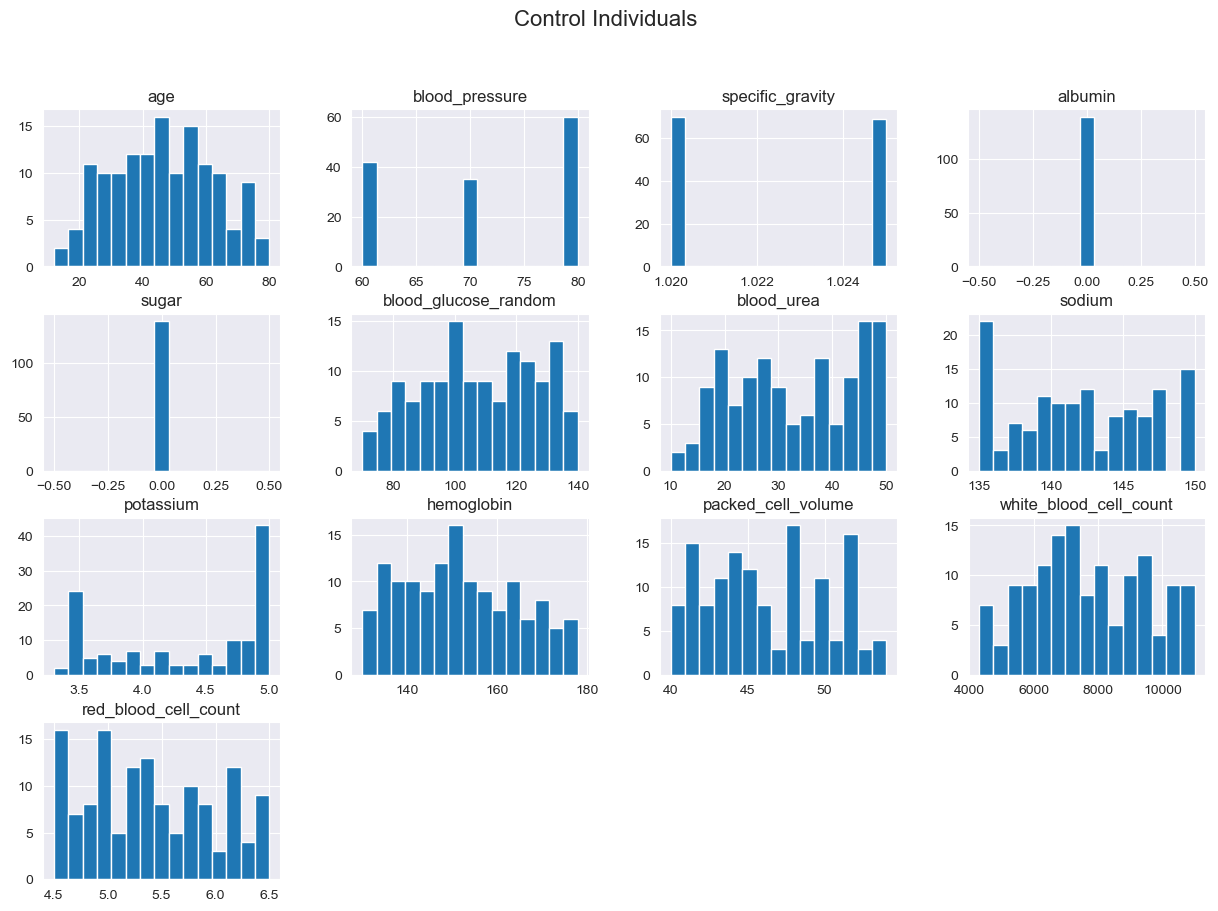

In [12]:
import matplotlib.pyplot as plt

def describe_and_plot(df, title):
    print(f"\n=== {title} ===\n")

    print(df.describe(include='all'))

    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    df[num_cols].hist(figsize=(15,10), bins=15)
    plt.suptitle(title, fontsize=16)
    plt.show()

# Affected
describe_and_plot(df_affected, "Affected Individuals")

# Control
describe_and_plot(df_control, "Control Individuals")


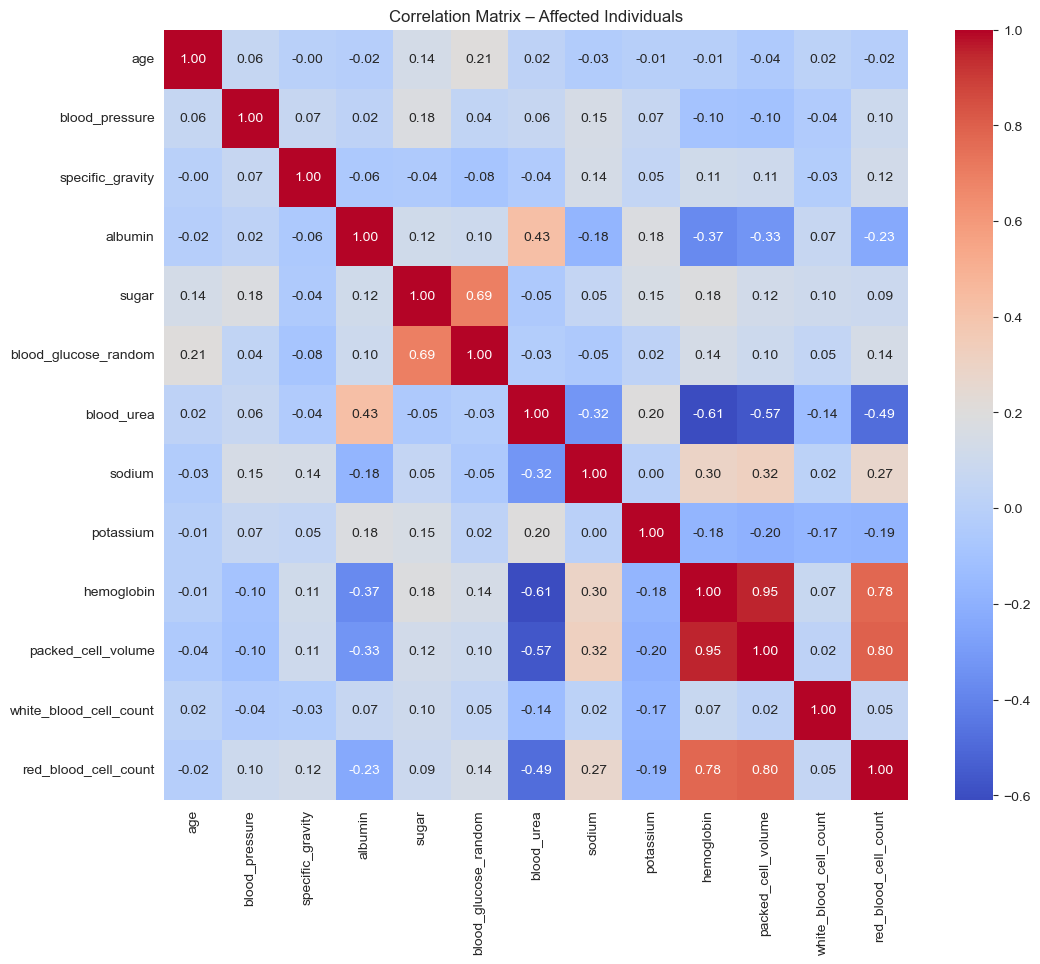

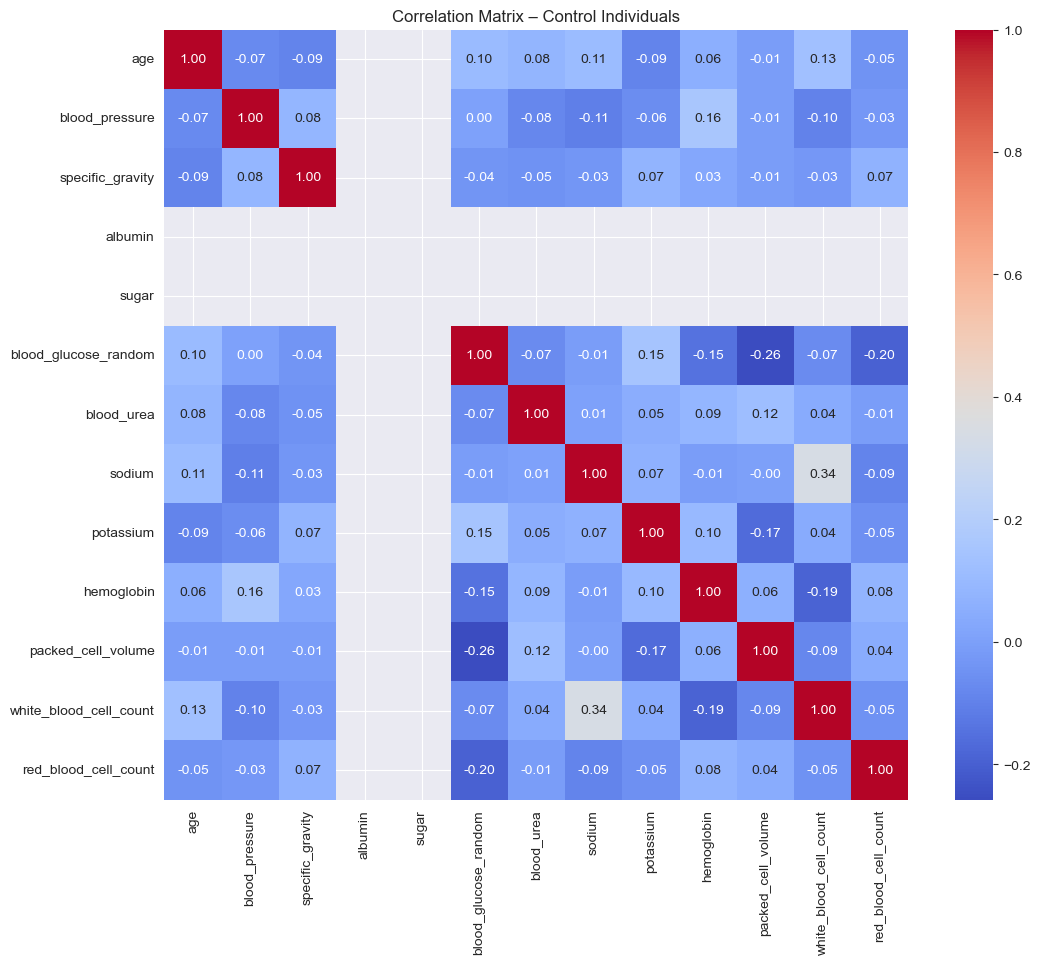

In [13]:
import seaborn as sns

def plot_correlation(df, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(title)
    plt.show()

plot_correlation(
    df_affected.select_dtypes(include=['float64', 'int64']),
    "Correlation Matrix – Affected Individuals"
)

plot_correlation(
    df_control.select_dtypes(include=['float64', 'int64']),
    "Correlation Matrix – Control Individuals"
)